In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras


# Data Generation

y = x^2 + 5*x + 3

In [15]:
x=np.arange(-80, 81, 0.5)

y=x**2+5*x+3

In [16]:
y.shape

(322,)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape

((257,), (65,))

# Model Definition

In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(units= 256, activation="relu", input_shape=[1]))
model.add(keras.layers.Dense(units= 256, activation="relu"))
model.add(keras.layers.Dense(units= 256, activation="relu"))
model.add(keras.layers.Dense(units= 256, activation="relu"))
model.add(keras.layers.Dense(units= 1))

/Users/taktakro/Desktop/MLProjects/venv3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
optimizer = keras.optimizers.RMSprop(learning_rate=.0001)
loss = keras.losses.MeanSquaredError()
metric = tf.metrics.RootMeanSquaredError()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [20]:
#call back
#loss in train data and val_loss in test data

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs= 1000, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8230489.5000 - root_mean_squared_error: 2867.9595 - val_loss: 9670091.0000 - val_root_mean_squared_error: 3109.6770
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8606706.0000 - root_mean_squared_error: 2932.4956 - val_loss: 9649214.0000 - val_root_mean_squared_error: 3106.3184
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8063833.0000 - root_mean_squared_error: 2839.2810 - val_loss: 9626467.0000 - val_root_mean_squared_error: 3102.6548
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8158010.0000 - root_mean_squared_error: 2855.8608 - val_loss: 9595862.0000 - val_root_mean_squared_error: 3097.7188
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7968543.5000 - root_mean_squared_error: 2821.4827 - val_loss: 9562789.0000 - val_root_mean_squared_error: 3092.3760
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7813297.5000 - root_mean_squared_error: 2794.7910 - val_loss: 9525036.0

In [23]:
hist = model.fit(x_train, y_train, batch_size= 64, epochs= 1000, validation_data=(x_test, y_test))

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 359453.0000 - root_mean_squared_error: 599.4678 - val_loss: 464167.2500 - val_root_mean_squared_error: 681.2982
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 353378.3750 - root_mean_squared_error: 594.4427 - val_loss: 476607.2500 - val_root_mean_squared_error: 690.3675
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 321162.6875 - root_mean_squared_error: 566.1612 - val_loss: 505505.3438 - val_root_mean_squared_error: 710.9890
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 366347.8750 - root_mean_squared_error: 604.3087 - val_loss: 523669.3438 - val_root_mean_squared_error: 723.6500
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 366957.5000 - root_mean_squared_error: 605.6235 - val_loss: 496261.9062 - val_root_mean_squared_error: 704.4586
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 365288.8750 - root_mean_squared_error: 603.4629 - val_loss: 528238.5625 - val_root_mean_squ

# Comparison

In [24]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


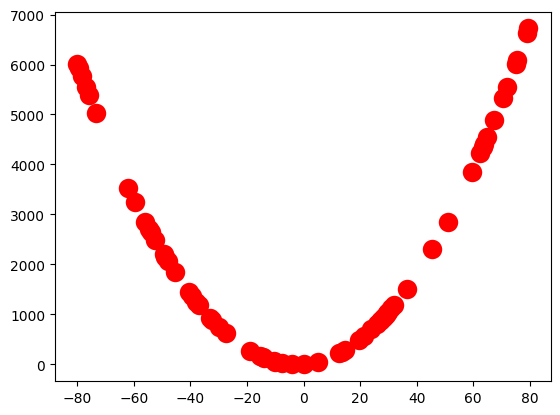

In [25]:
plt.scatter(x_test, y_test, color='red', linewidths=8)

plt.show()

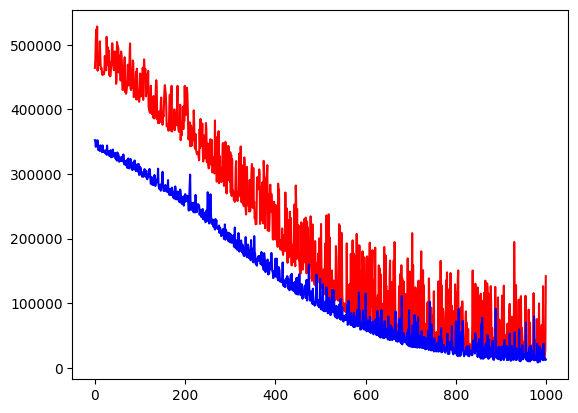

In [26]:
plt.plot(hist.history['val_loss'], color='red')
plt.plot(hist.history['loss'], color='blue')
plt.show()

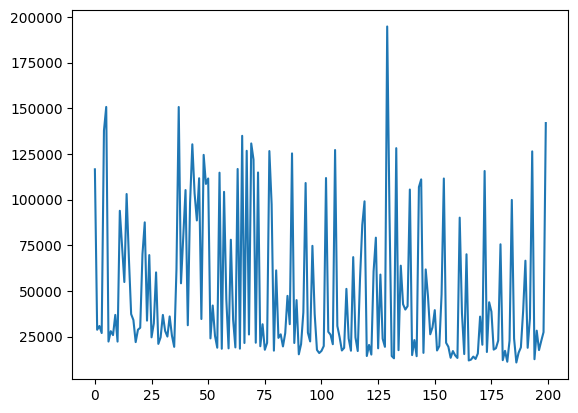

In [27]:
plt.plot(hist.history['val_loss'][800:])
plt.show()